In [1]:
#main libraries
import tensorflow as tf
from tensorflow import keras

#helper libraries
import numpy as np
import matplotlib.pyplot as plt

2022-08-06 19:19:10.613961: E tensorflow/core/platform/hadoop/hadoop_file_system.cc:132] HadoopFileSystem load error: libhdfs.so: cannot open shared object file: No such file or directory
Matplotlib is building the font cache; this may take a moment.


In [2]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 1s 0us/step


In [3]:
class_names = ['T-shirt / Top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle Boot']

Below is our Dataset Exploration. 

In [4]:
train_images.shape

(60000, 28, 28)

In [5]:
len(train_labels)

60000

In [6]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [7]:
test_images.shape

(10000, 28, 28)

In [8]:
len(test_images)

10000

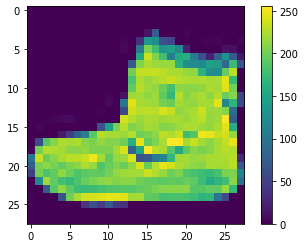

In [9]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.gca().grid(False)

In [10]:
train_images = train_images / 255.0

test_images = test_images / 255.0

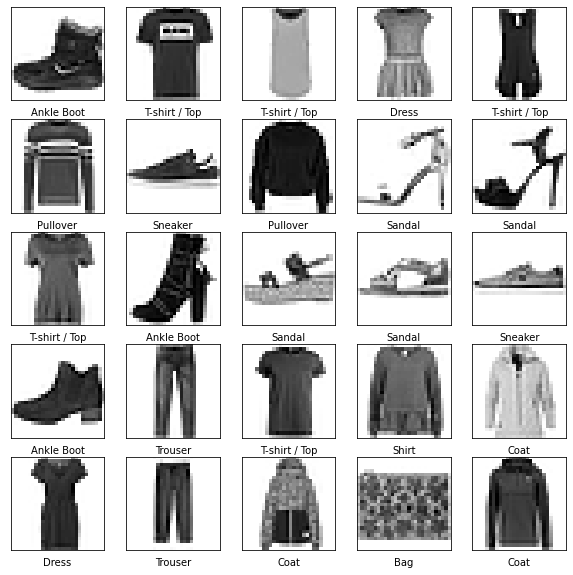

In [11]:
import matplotlib.pyplot as plt
#matplotlib inline

plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(train_images[i], cmap=plt.cm.binary)
  plt.xlabel(class_names[train_labels[i]])

In [12]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28,28)),
    keras.layers.Dense(128, activation=tf.nn.relu),
    keras.layers.Dense(10, activation=tf.nn.softmax)
])

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [13]:
model.compile(optimizer = tf.keras.optimizers.Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [14]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples


2022-08-06 19:20:29.012983: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 401408 exceeds 10% of system memory.
2022-08-06 19:20:29.015275: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 401408 exceeds 10% of system memory.
2022-08-06 19:20:29.016427: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 5120 exceeds 10% of system memory.
2022-08-06 19:20:29.016869: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 5120 exceeds 10% of system memory.
2022-08-06 19:20:29.023225: W tensorflow/core/framework/cpu_allocator_impl.cc:81] Allocation of 401408 exceeds 10% of system memory.


Epoch 1/10
60000/60000 [==============================] - 39s 643us/sample - loss: 0.5006 - acc: 0.8249
Epoch 2/10
60000/60000 [==============================] - 39s 656us/sample - loss: 0.3739 - acc: 0.8650
Epoch 3/10
60000/60000 [==============================] - 16s 267us/sample - loss: 0.3355 - acc: 0.8771
Epoch 4/10
60000/60000 [==============================] - 17s 284us/sample - loss: 0.3111 - acc: 0.8877
Epoch 5/10
60000/60000 [==============================] - 25s 409us/sample - loss: 0.2927 - acc: 0.8918
Epoch 6/10
60000/60000 [==============================] - 26s 432us/sample - loss: 0.2791 - acc: 0.8962
Epoch 7/10
60000/60000 [==============================] - 21s 344us/sample - loss: 0.2684 - acc: 0.8993
Epoch 8/10
60000/60000 [==============================] - 17s 279us/sample - loss: 0.2550 - acc: 0.9041
Epoch 9/10
60000/60000 [==============================] - 17s 287us/sample - loss: 0.2462 - acc: 0.9084
Epoch 10/10
60000/60000 [==============================] - 21s 3

In [15]:
test_loss, test_acc = model.evaluate(test_images, test_labels)

print('Test Accuracy: ', test_acc)

10000/10000 [==============================] - 2s 245us/sample - loss: 0.3493 - acc: 0.8766
Test Accuracy:  0.8766


In [16]:
predictions = model.predict(test_images)

In [17]:
predictions[0]

array([9.27548740e-08, 8.45005142e-12, 1.16041832e-09, 6.73033406e-14,
       1.25135635e-08, 5.78247673e-05, 3.24381411e-09, 7.37247465e-04,
       3.26909366e-09, 9.99203444e-01], dtype=float32)

In [18]:
np.argmax(predictions[0])

9

In [19]:
test_labels[0]

9

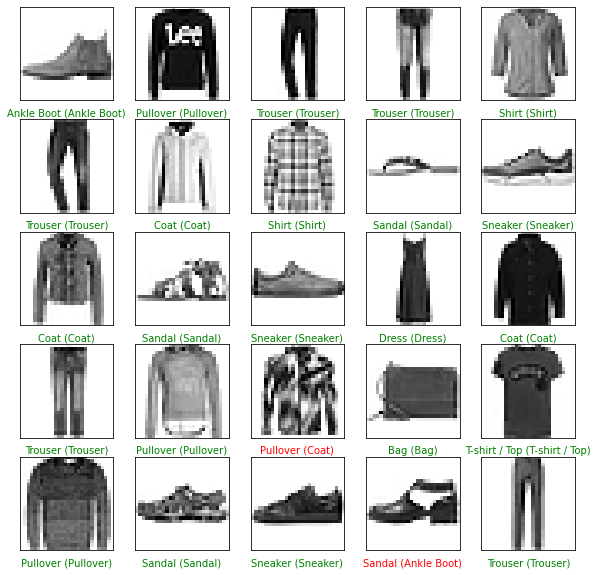

In [20]:
# Plot the first 25 test images, their predicted labels, and their true labels
# Color correct predictions in green, incorrect predictions in red
plt.figure(figsize=(10,10))
for i in range(25):
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid('off')
  plt.imshow(test_images[i], cmap=plt.cm.binary)
  predicted_label = np.argmax(predictions[i])
  true_label = test_labels[i]
  if predicted_label == true_label:
    color = 'green'
  else:
    color = 'red'
  plt.xlabel("{} ({})".format(class_names[predicted_label],
                              class_names[true_label]),
                              color=color)

In [21]:
#Grab an image from test dataset
img = test_images[0]

print(img.shape)

(28, 28)


In [22]:
#Add the image to a batch where it's the only member
img = (np.expand_dims(img,0))

print(img.shape)

(1, 28, 28)


In [23]:
prediction = predictions[0]

np.argmax(prediction)

9